# Вариант 3

Борисова Дарья ПИ20-6 Билет 26

1. Загрузить датасет в Python.



In [59]:
# импорт библиотек
import numpy as np
import pandas as pd

# загрузка данных из файла
data = pd.read_csv('mushrooms.csv')
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


2. Описать набор данных и решаемую задачу.


Необходимо решить задачу классификации по данным грибов и разбить выборку на 2 класса (смертельных и съедобных)

In [60]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Количество уникальных цветов шляпок грибов - 10

Самый популярный цвет жабр криба это - b (желтовато-коричневый)

Количество значений в столбце odor, как и во всей таблице - 8124, что говорит об отсутсвии пропусков в данных

In [61]:
data['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

Количество элементов по уникальным значениям

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [63]:
data.shape

(8124, 23)

В датасете 8124 элемент и 23 признаков, включая целевой

3. Выделить целевую переменную и факторные переменные.


Целевая переменная - признак class. Факторные переменные - остальные признаки

In [64]:
data['class'].nunique()

2

In [65]:
# создаем 2 новых датафрейма
y = pd.DataFrame(data['class'])
x = pd.DataFrame(data.drop(['class'], axis=1))
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


4. Удалить ненужные данные, проанализировать отсутствующие значения.


Тяжело сказать, какие признаки являются лишними, мне кажется, что не стоит удалять их

In [66]:
# подсчет уникальных значений столбца
data['bruises'].value_counts()

f    4748
t    3376
Name: bruises, dtype: int64

Проверка пропущенных значений

In [67]:
# Проверяем пропущенные значения
x.isna().sum(axis=0)

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

5. Прокомментировать количественные параметры датасета.


В датасете присутсвуют только категориальные параметры, поэтому можно посмотреть на их распределение

In [68]:
# импорт библиотек
import seaborn as sns
import matplotlib.pyplot as plt

По графику можно посмотреть распределение данных

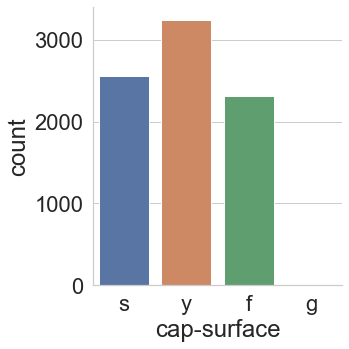

In [69]:
sns.catplot(data=data, x='cap-surface', kind="count"); 

В целом, кроме распределений, смотреть здесь особо нечего

6. Разбить выборку на обучающую и тестовую.


In [70]:
from sklearn.model_selection import train_test_split

# разбиение на тестовую и обучающую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% обучающей выборки

7. Работа по вариантам.


Вариант 3. Построение модели и оптимизация гиперпараметров.
Данный вариант предполагает фокусировку на процессе улучшения эффективности модели обучения с учителем. Студенту следует подготовить датасет к обучению, обучить одну из моделей с учителем со значениями гиперпараметров по умолчанию, получить значение эффективности. После этого вручную или автоматически подобрать значения гиперпараметров таким образом, чтобы получить максимальный прирост эффективности.


В датасете только категориальные признаки, поэтому необходима только one-hot кодировка

In [71]:
# one-hot кодировка для категориальных данных
x = pd.get_dummies(x)
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
y = y.replace({'class':{'p':0, 'e':1}})
y.head()

,class
0,0
1,1
2,1
3,0
4,1


Предобработка была произведена выше

In [73]:
from sklearn.model_selection import train_test_split

# разбиение на тестовую и обучающую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% обучающей выборки

In [74]:
# создаем сводную таблицу метрик моделей
scores = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1_score', 'time'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLP',
        'LinearDiscriminantAnalysis', 
        'RandomForestClassifier'
    ]
)


In [75]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    return pd.Series(
        (accuracy, precision, recall, f1_score),
        index=['accuracy', 'precision', 'recall', 'f1_score']
    )

In [76]:
import time

def model_and_metrics(model):
    start = time.time() # точка отсчета времени
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)  
    end = time.time() - start # время работы программы
    returned = get_metrics(y_test, y_pred).append(pd.Series((end), index = ['time']))
    return returned

In [77]:
from sklearn.linear_model import LogisticRegression

# Логистическая регрессия
model = LogisticRegression()
scores.iloc[0] = model_and_metrics(model)

In [78]:
from sklearn import svm

# Метод опорных векторов c ядром линейной функции
model = svm.SVC(kernel='linear')
scores.iloc[1] = model_and_metrics(model)

In [79]:
from sklearn import svm

# Метод опорных векторов c ядром радиальной базисной функции
model = svm.SVC(kernel='rbf')
scores.iloc[2] = model_and_metrics(model)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# k ближайших соседей
model = KNeighborsClassifier()
scores.iloc[3] = model_and_metrics(model)

In [81]:
from sklearn.neural_network import MLPClassifier

# Многоуровневый Перцептрон
model = MLPClassifier()
scores.iloc[4] = model_and_metrics(model)

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Линейный дискриминантный анализ
model = LinearDiscriminantAnalysis()
scores.iloc[5] = model_and_metrics(model)

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Случайный лес
model = RandomForestClassifier()
scores.iloc[6] = model_and_metrics(model)

После обучения моделей можно сравнить их качество и выделить лучшие

In [84]:
scores

,accuracy,precision,recall,f1_score,time
LogisticRegression,1.0,1.0,1.0,1.0,0.110829
SVC linear,1.0,1.0,1.0,1.0,0.208503
SVC gauss,1.0,1.0,1.0,1.0,0.985207
KNeighborsClassifier,1.0,1.0,1.0,1.0,0.30067
MLP,1.0,1.0,1.0,1.0,1.420104
LinearDiscriminantAnalysis,1.0,1.0,1.0,1.0,0.132982
RandomForestClassifier,1.0,1.0,1.0,1.0,0.356981


#### Матрицы ошибок

In [51]:
from sklearn import metrics

model = LogisticRegression()
model.fit(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)

array([[782,   0],
       [  0, 843]], dtype=int64)

[TP, FP, \
FN, TN]

- TP — true positive: классификатор верно отнёс объект к рассматриваемому классу.
- TN — true negative: классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.
- FP — false positive: классификатор неверно отнёс объект к рассматриваемому классу.
- FN — false negative: классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

доля верно классификацированных объектов (recall) \
доля ошибочно классификацированных объектов (1-precision)

## Вывод

Можно сказать на примере Логистической регрессии, что наша модель переобучилась и идеально классифицирует данные

## Оптимизация гиперпараметров

Подбор гиперпараметров: 
- n_estimators — число «деревьев» в «случайном лесу».
- max_features — число признаков для выбора расщепления.
- max_depth — максимальная глубина деревьев.
- min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
- min_samples_leaf — минимальное число объектов в листьях.
- bootstrap — использование для построения деревьев подвыборки с возвращением.

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# генерируем все возможные виды гиперпараметров
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

# создаем словарь параметров
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestClassifier()

# инициализируем функцию подбора параметров
rs = RandomizedSearchCV(model, 
                        param_dist, 
                        n_iter = 100,  
                        verbose = 1, # уровень детализации
                        n_jobs=-1, # использование всех процессов для параллельного выполнения
                        random_state=0)

rs.fit(x_train, y_train)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 400,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': False}

In [39]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,400,23,2,sqrt,14,False,1.000000,1.000000,1.000000,1
1,700,2,2,log2,11,True,1.000000,1.000000,1.000000,1
2,700,12,2,sqrt,13,False,1.000000,1.000000,1.000000,1
3,600,23,2,sqrt,15,False,1.000000,1.000000,1.000000,1
4,1000,44,2,sqrt,9,True,1.000000,1.000000,0.999846,5
5,600,50,2,sqrt,7,False,1.000000,0.998460,0.999538,6
6,700,18,7,sqrt,7,False,1.000000,0.997691,0.998923,7
7,1000,12,7,sqrt,10,True,0.996923,0.997691,0.998307,8
8,700,23,7,log2,15,False,0.996923,0.997691,0.998307,8
9,300,28,7,log2,13,True,0.996923,0.997691,0.998153,10


Теперь создадим столбчатые графики, на которых, по оси Х, расположены значения гиперпараметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять то, какие значения гиперпараметров, в среднем, лучше всего себя показывают.

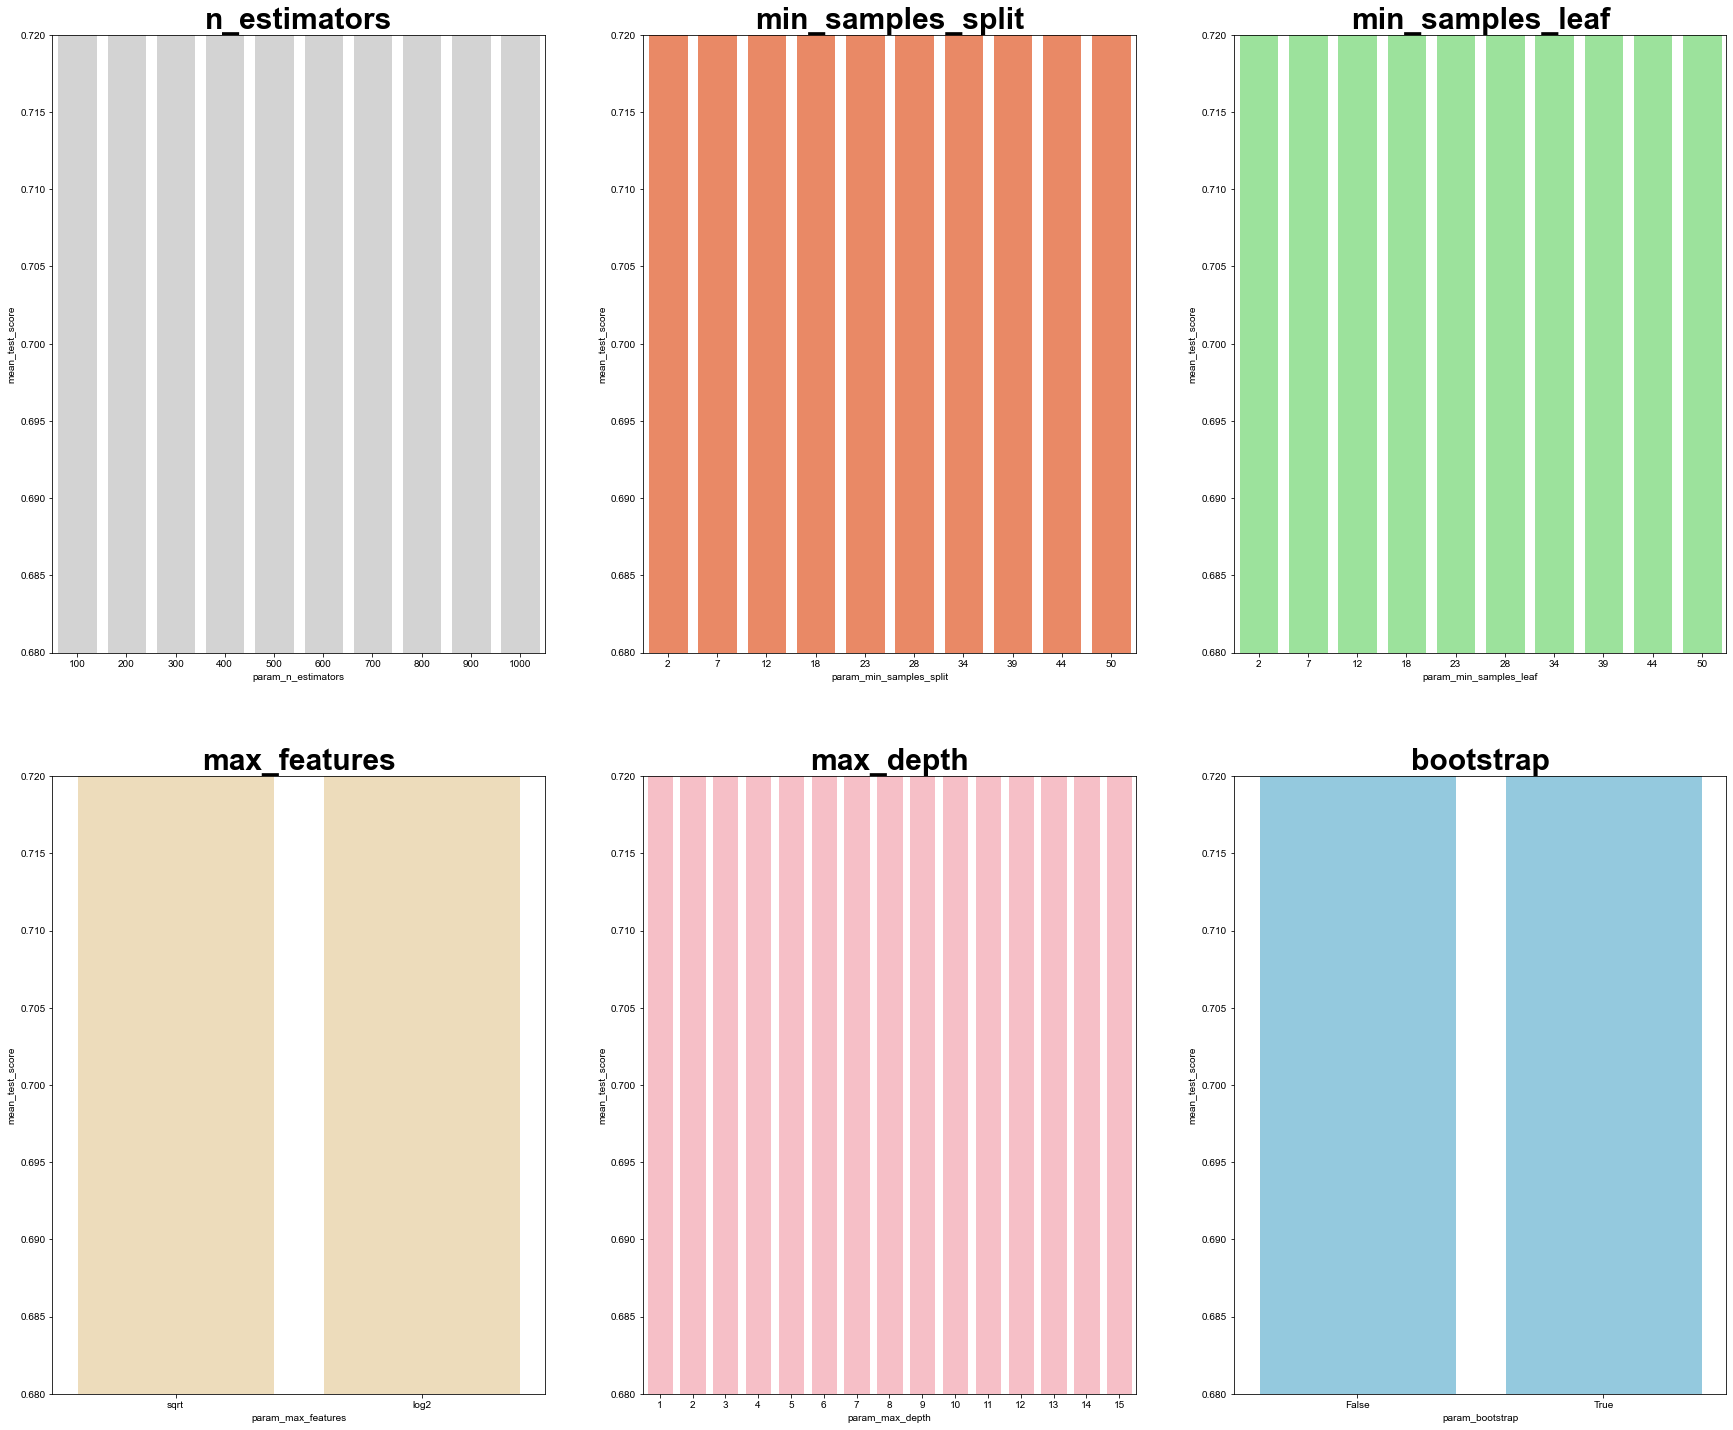

In [40]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.68,.72])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.68,.72])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.68,.72])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.68,.72])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.68,.72])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.68,.72])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

Для более точного подбора гиперпараметров воспользуемся GridSearchCV. В нем прогоняются все возможные коминации гиперпараметров, в отличии от RandomizedSearchCV, где мы самостоятельно задаем количесвто итераций поиска.

In [42]:
from sklearn.model_selection import GridSearchCV

# записываем лучшие подобранные параметры
n_estimators = [100,200,300]
min_samples_split = [2, 7, 12, 18]
min_samples_leaf = [12,23,18,28]
max_features = ['log2']
max_depth = [2,3,4]
bootstrap = [True]

# создаем словарь параметров
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestClassifier()

# инициализируем функцию подбора параметров
gs = GridSearchCV(model, 
                  param_grid, 
                  verbose = 1, # уровень детализации
                  n_jobs=-1) # использование всех процессов для параллельного выполнения

gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=12,
                       min_samples_split=12, n_estimators=200)
{'bootstrap': True, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 12, 'n_estimators': 200}


Обучаем модель и смотрим на результаты

In [45]:
model = RandomForestClassifier()

start = time.time() # точка отсчета времени
model.fit(x_train, y_train)
y_pred_gs = gs.best_estimator_.predict(x_test)
end = time.time() - start # время работы программы
returned = get_metrics(y_test, y_pred_gs).append(pd.Series((end), index = ['time']))

<ipython-input-45-8a494dbae1b8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [48]:
# создаем сводную таблицу метрик моделей
scores_ht = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1_score', 'time'],
    index=[
        'RandomForestClassifier + ht'
    ]
)


In [49]:
scores_ht.iloc[0] = returned

In [50]:
scores_ht

,accuracy,precision,recall,f1_score,time
RandomForestClassifier + ht,0.990154,0.981374,1.0,0.990599,0.344294


In [85]:
scores

,accuracy,precision,recall,f1_score,time
LogisticRegression,1.0,1.0,1.0,1.0,0.110829
SVC linear,1.0,1.0,1.0,1.0,0.208503
SVC gauss,1.0,1.0,1.0,1.0,0.985207
KNeighborsClassifier,1.0,1.0,1.0,1.0,0.30067
MLP,1.0,1.0,1.0,1.0,1.420104
LinearDiscriminantAnalysis,1.0,1.0,1.0,1.0,0.132982
RandomForestClassifier,1.0,1.0,1.0,1.0,0.356981


## Вывод

Из-за переобучения моделей изначально, подбор гиперпараметров лишь ухудшил ситуацию, но с другими данными подбор оказал бы положительное вляние на повышение метрик